## Comparison of QAOA post-processing
In this notebook the standard QAOA is compared with and without post-processing for a max cut problem. 

See 

- https://arxiv.org/pdf/2406.01743, Appendix B

- https://arxiv.org/pdf/2405.09169, Mitigation: Hamming distance 1


In [1]:
from qaoa import QAOA, problems, mixers, initialstates, util

In [2]:
import networkx as nx
import sys

sys.path.append("../")
from plotroutines import *

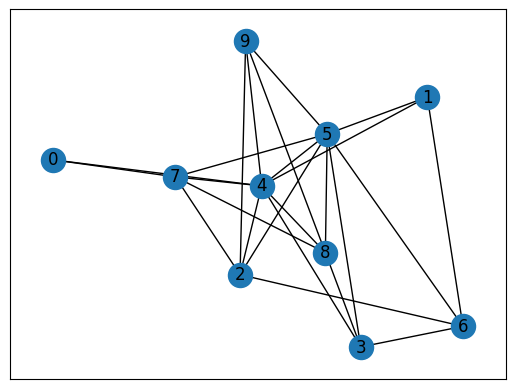

In [3]:
G = nx.read_gml("data/w_ba_n10_k4_0.gml")
nx.draw_networkx(G)
mincost = -8.657714089848158  # precalculated

Create five QAOA instances, whereas the first instance is initialized with `post=True`, and the last four is initialized with `post=False`

In [4]:
qaoa_post = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X(),
    post=5,
)
qaoa_k0 = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X(),
)
qaoa_k1 = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X(),
)
qaoa_k3 = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X(),
)
qaoa_k5 = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X(),
)

Run optimization on the first instance until given max depth 

In [5]:
maxdepth = 10
qaoa_post.optimize(depth=maxdepth)

2024-06-26 11:16:41 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
1 0
2024-06-26 11:16:41 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2024-06-26 11:16:41 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2024-06-26 11:16:41 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2024-06-26 11:16:44 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2024-06-26 11:16:44 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape
2024-06-26 11:16:44 [info     ] cost(depth 1 = -6.9182286803692685 file=qaoa.qaoa func=optimize
2024-06-26 11:16:44 [info     ] cost(depth 2 = -7.236983154702914 file=qaoa.qaoa func=optimize
2024-06-26 11:16:45 [info     ] cost(depth 3 = -7.649845982814269 file=qaoa.qaoa func=optimize
2024-06-26 11:16:46 [info     ] cost(depth 4 = -7.85270220121

Compare expectation value, with and without post-processing

In [ ]:
print(f"Expected value at depth {maxdepth} without post_processing: {qaoa_post.get_Exp(maxdepth)}")
print(f"Expected value at depth {maxdepth} with post-processing: {qaoa_post.Exp_post_processed}")
print(f"Precalculated minimum cost: {mincost}")

Expected value at depth 10 without post_processing: -8.305449436557295
Expected value at depth 10 with post-processing: -8.530956307425708
Precalculated minimum cost: -8.657714089848158


Compare expecation value for given Ks at all depths up until given max depth. 

2024-06-26 11:09:26 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
1 0
2024-06-26 11:09:26 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2024-06-26 11:09:26 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2024-06-26 11:09:26 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2024-06-26 11:09:29 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2024-06-26 11:09:29 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape
2024-06-26 11:09:29 [info     ] cost(depth 1 = -6.87861316031231 file=qaoa.qaoa func=optimize
2024-06-26 11:09:30 [info     ] cost(depth 2 = -7.37652490466317 file=qaoa.qaoa func=optimize
2024-06-26 11:09:30 [info     ] cost(depth 3 = -7.646614204203478 file=qaoa.qaoa func=optimize
2024-06-26 11:09:31 [info     ] cost(depth 4 = -7.69980474833004

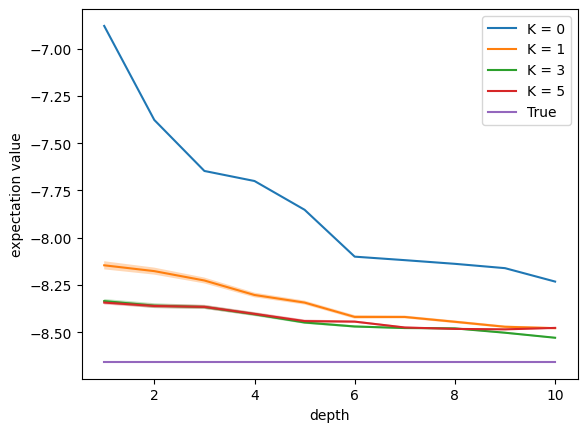

In [ ]:
import matplotlib.pyplot as plt

maxdepth = 10
instances = [qaoa_k0, qaoa_k1, qaoa_k3, qaoa_k5]
K = [0, 1, 3, 5]
x = np.arange(1, maxdepth + 1)

for k, instance in zip(K, instances):
    instance.optimize(maxdepth)
    exp, var = util.post_process_all_depths(instance, k)

    plt.fill_between(x, exp + np.sqrt(var), exp - np.sqrt(var), alpha=0.3)
    plt.plot(x, exp, label=f"K = {k}")

plt.plot(x, [mincost]*maxdepth, label="True")
plt.legend()
plt.xlabel("depth")
plt.ylabel("expectation value")
plt.show()